# df cleaning

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronMath_38.csv')


In [2]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.949346
2,44784,6,value_scantronMath,True,1.021622,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.990132
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.035514
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.934393


In [4]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'course_AIDELIB7-8NC',
 'course_AIDSTU6-12NC',
 'course_ARTHIS7-8',
 'course_Advisory 5',
 'course_Advisory 6',
 'course_Advisory 7',
 'course_Advisory 7-8',
 'course_Advisory 8',
 'course_Aide Off 7-8',
 'course_BAND 6',
 'course_BAND 7 Brass',
 'course_BAND 7 Percu',
 'course_BAND 7 Wood',
 'course_BROADCAS 7-8',
 'course_Band 7',
 'course_Band7',
 'course_BandGuitar78',
 'course_CONTISSU 7-8',
 'course_CREAWRT 7-8',
 'course_CSElec Gr7-8',
 'course_CareerPrep-A',
 'course_CareerPrepA5',
 'course_CivicH/Adv 7',
 'course_CivicsGr 7',
 'course_ContIssu 7-8',
 'course_Drama 7-8',
 'course_ELA IntPK-6',
 'course_ELAGrPK5H/Ad',
 'course_ELAGrPK6H/Ad',
 'course_ENRICELA78',
 'course_ENRICMATH78',
 'course_ESLENRICH6-8',
 'course_ESLEnrich6-8',
 'course_Eng 7 H/Adv',
 'course_EngElec7-8',
 'course_EngIntrv7-12',
 'course_EngLang6',
 'course_English Gr 7',
 'course_English Gr 8',
 'course_English LA 5',
 'course_E

In [5]:
#drop Id and binary label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'is_proficient'])

In [6]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronMath'].drop(columns=['dataSource'])


In [9]:
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Print DataFrame info to see all columns and their data types
print(one_hot_encoded_df2.info())

# Print the count of null values per column
print(one_hot_encoded_df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20571 entries, 0 to 20570
Columns: 139 entries, level to past_proficient_score
dtypes: bool(133), float64(2), int64(4)
memory usage: 3.6 MB
None
level                        0
proficient_score             0
course_AIDELIB7-8NC          0
course_AIDSTU6-12NC          0
course_ARTHIS7-8             0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5422
Length: 139, dtype: int64


In [10]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

# Print the columns that have null values
print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [11]:
one_hot_encoded_df2.shape

(20571, 139)

In [12]:
one_hot_encoded_df2['past_proficient_score']

0        0.957757
1        0.949346
2        0.990132
3        1.035514
4        0.934393
           ...   
20566         NaN
20567         NaN
20568         NaN
20569         NaN
20570    0.913837
Name: past_proficient_score, Length: 20571, dtype: float64

In [13]:
1# drop na values
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [14]:
one_hot_encoded_df2.shape

(15149, 139)

## PCA

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [16]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 46
Cumulative explained variance: 0.8011601450717305


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is already defined and contains your scaled data
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 80% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [18]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [19]:
first_46_pcs_df = X_pca_df.iloc[:, :46].copy()

In [21]:
first_46_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
0,-4.424973,-3.374419,0.630052,0.103905,17.913495,12.317036,-12.257000,0.757292,3.961264,12.424235,1.527398,2.319505,-4.647349,-12.374293,7.652799,-2.473692,-1.062698,0.373008,0.423712,-1.579226,-2.399470,-0.377046,0.121161,-0.507311,-1.733529,1.419853,4.690883,-0.229783,0.136261,1.382050,1.399072,-0.630103,-2.510257,-0.363785,-0.474855,-0.751609,-0.146748,0.023852,0.086781,-0.069700,0.000992,-0.003360,0.034422,-0.005677,0.037015,0.040003
1,-3.165503,-3.274472,0.494705,0.088032,12.367288,7.214545,-6.339064,0.167683,2.041813,5.773693,0.766177,1.352829,-3.364959,-4.448610,2.104334,-0.448774,-0.302262,0.165548,-0.214119,-0.609760,0.613117,-0.051081,-0.025624,0.196376,1.202245,0.561591,-0.257986,-0.255070,-0.044089,-0.702751,-0.161254,-0.060772,0.435149,-0.211651,-0.091829,0.039528,-0.032978,-0.009622,-0.010279,0.006635,0.000258,-0.001534,-0.009063,0.002187,-0.000086,-0.008272
2,-3.144057,-3.900811,0.575648,-0.131135,16.153109,-9.537643,-4.609975,-0.035356,-3.692924,4.197537,-0.190407,1.450112,1.438696,13.937511,0.850386,0.982561,-2.471208,0.924230,2.947940,3.208078,-0.459408,0.686929,0.007788,0.047002,1.139592,0.830124,-0.770177,-2.539929,2.475509,-0.027873,-1.478276,-0.401205,1.097991,1.880791,0.983592,-0.219896,0.541256,0.058079,-0.015716,-0.029090,0.019304,-0.005368,-0.009313,-0.022710,-0.013547,0.011342
3,-3.279711,-3.450557,0.559836,0.078018,13.991623,7.445662,-8.528214,0.539291,2.441729,8.515747,0.970506,2.069341,-4.450385,-7.759511,6.298902,-1.989816,-1.589159,0.109582,-0.399072,-3.444722,-0.185545,-0.532710,-0.072589,0.017516,0.099300,-0.562547,-1.069894,1.243554,-1.239355,0.074398,0.341251,0.514858,-0.157821,-0.329001,-0.090586,0.310700,-0.092888,-0.013424,-0.012382,0.031966,-0.008952,0.008245,0.009113,0.006156,-0.012473,-0.005548
4,-3.749077,-3.924373,0.643243,0.136529,16.164431,12.268235,-10.842578,0.495200,4.003513,10.983058,1.377585,2.718990,-6.646299,-12.517640,7.664954,-2.374755,-2.539845,0.686429,0.704345,-2.809806,-1.517287,-0.554009,-0.037490,0.137316,0.372937,-0.169871,-1.405349,-0.013307,-1.071588,-0.820887,0.053653,0.569584,0.314305,-0.215324,-0.110325,0.165406,-0.016032,-0.001328,-0.016213,0.028228,-0.006618,0.004991,0.005349,0.001658,-0.018412,-0.003543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15144,-0.575600,-0.786805,-0.003907,0.070387,-0.957201,-0.089355,-0.372317,-0.025270,-0.012220,0.114315,-0.009032,0.018236,0.029353,0.009319,0.080731,0.007033,-0.102195,-0.366553,-0.058200,0.037214,-0.038445,0.073197,0.014353,0.056580,-0.141509,0.036758,0.076622,-0.216909,-0.109628,-0.191680,0.093501,0.096997,-0.015251,0.078169,0.048027,0.035160,0.039886,0.001130,-0.005683,0.012132,-0.000388,0.005162,0.004448,-0.003072,-0.004584,-0.002921
15145,-0.534838,-0.801626,-0.009471,0.058853,-0.947914,-0.072177,-0.349596,0.115313,-0.019473,0.121339,-0.029518,0.033497,0.037334,0.013713,0.120071,0.068635,-0.347356,-0.597717,0.026013,-0.044665,0.073497,0.106136,-0.032754,-0.157708,0.211706,-0.071959,-0.142974,0.310657,0.337759,0.345957,-0.205030,-0.177682,0.077992,-0.003448,-0.017041,-0.080740,-0.017403,-0.010059,0.007367,-0.008864,0.002716,-0.003997,-0.011495,-0.000816,0.012464,-0.006478
15146,-0.077568,-0.893679,-0.000695,-0.062371,-0.985513,-0.245027,-0.443282,0.011321,-0.002922,0.183471,-0.002905,0.015966,0.029920,0.000397,0.048039,0.016372,-0.121988,-0.446031,-0.025289,0.045953,0.018960,0.006226,0.002809,0.025919,0.038233,0.000281,-0.010582,0.056635,0.024951,0.058559,-0.027606,-0.033408,-0.006705,-0.032489,-0.020676,-0.012151,-0.017506,0.002817,0.002245,-0.007473,-0.000049,-0.002847,-0.000268,0.002003,0.000222,0.004054
15147,-0.075657,-0.894374,-0.000956,-0.06291

In [24]:
]
# Get the PCA components (loadings)
components = pca.components_[:46]  # First 46 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HOMEROOM', 'course_LANGUAGE 3', 'course_MATH 3', 'course_PE 3', 'course_SCIENCE 3']
Top features for PC2: ['course_CivicsGr 7', 'course_Geog Gr7', 'course_English Gr 7', 'course_Math 7', 'course_LifeSci Gr7']
Top features for PC3: ['course_WLDHIS 1500', 'course_English Gr 8', 'course_PhySci Gr 8', 'course_CareerPrepA5', 'course_Advisory 8']
Top features for PC4: ['course_READING 4', 'course_LANGUAGE 4', 'course_MATH 4', 'course_SCIENCE 4', 'course_SOC ST 4']
Top features for PC5: ['course_EnrichmtP6', 'school_Middle School A', 'course_English LA 5', 'course_Science Gr 5', 'course_SocialStuGr5']
Top features for PC6: ['course_MATH 6', 'course_English LA 6', 'course_PE 6', 'course_Science Gr 6', 'course_English LA 5']
Top features for PC7: ['school_Middle School D', 'course_SoSt6H/A', 'course_SciGr6H/A', 'course_Math6H/Adv', 'course_ELAGrPK6H/Ad']
Top features for PC8: ['course_CivicH/Adv 7', 'course_GeogH/AdvGr7', 'course_LifeSciH Gr7', 'course_Eng 7 H/Adv

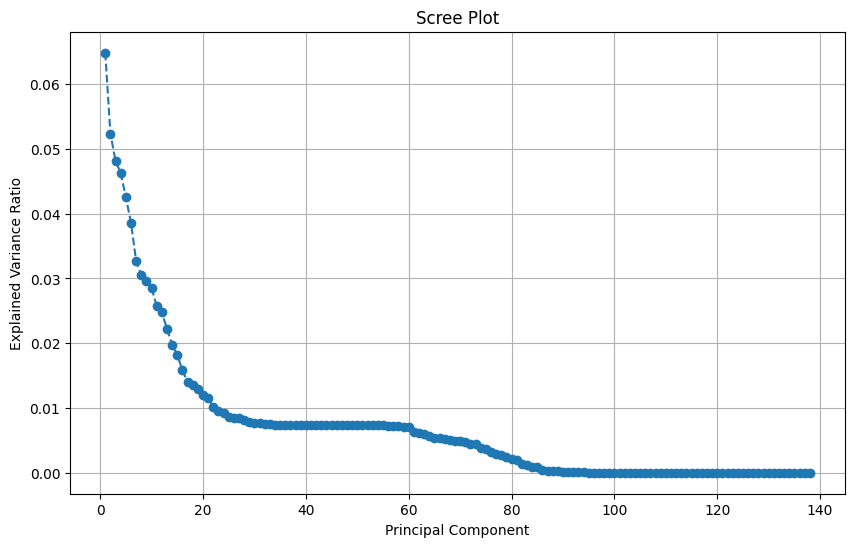

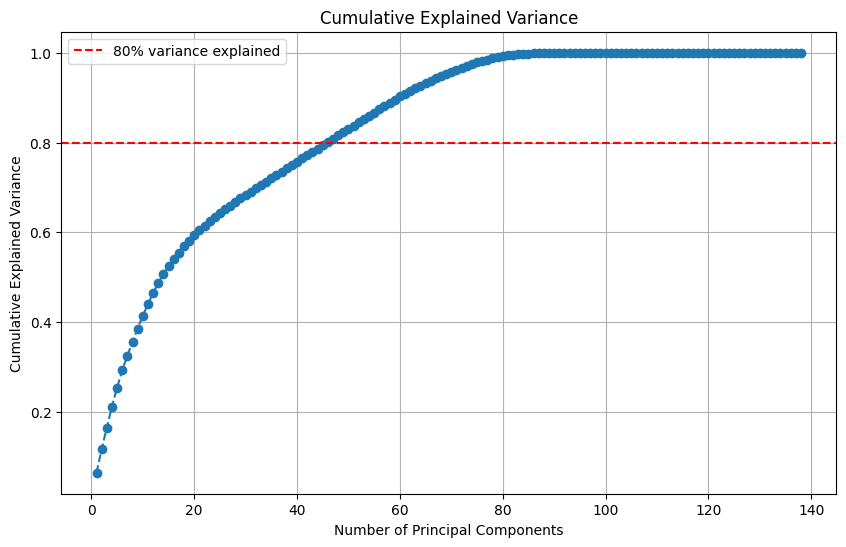

In [25]:


# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Modeling

## Catboost model

In [26]:

from sklearn.model_selection import train_test_split


In [27]:
X = first_46_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels


In [28]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0724144	test: 0.0757366	best: 0.0757366 (0)	total: 147ms	remaining: 1m 13s
50:	learn: 0.0464635	test: 0.0541950	best: 0.0541831 (49)	total: 552ms	remaining: 4.86s
100:	learn: 0.0441746	test: 0.0538444	best: 0.0538433 (97)	total: 981ms	remaining: 3.88s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.05383033692
bestIteration = 109

Shrink model to first 110 iterations.
Mean Squared Error (MSE): 0.00
R-squared (R²): 0.54
Root Mean Squared Error (RMSE): 0.05


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


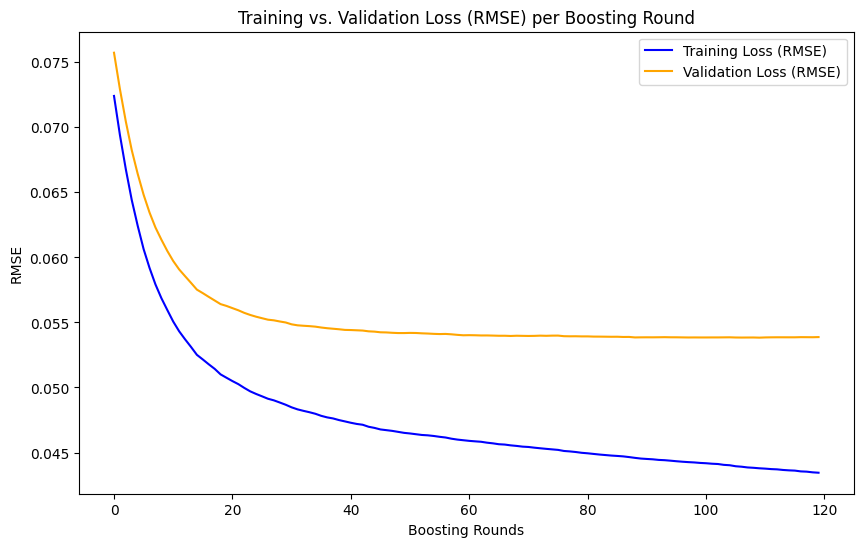

In [29]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score

# Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


# final XGBoost model

Cross-Validated MSE: 0.00
[0]	train-rmse:0.07140	eval-rmse:0.07496
[1]	train-rmse:0.06765	eval-rmse:0.07160
[2]	train-rmse:0.06432	eval-rmse:0.06870
[3]	train-rmse:0.06132	eval-rmse:0.06621
[4]	train-rmse:0.05882	eval-rmse:0.06415
[5]	train-rmse:0.05660	eval-rmse:0.06241
[6]	train-rmse:0.05464	eval-rmse:0.06096
[7]	train-rmse:0.05298	eval-rmse:0.05978
[8]	train-rmse:0.05147	eval-rmse:0.05875
[9]	train-rmse:0.05021	eval-rmse:0.05791
[10]	train-rmse:0.04905	eval-rmse:0.05728
[11]	train-rmse:0.04804	eval-rmse:0.05668
[12]	train-rmse:0.04723	eval-rmse:0.05626
[13]	train-rmse:0.04651	eval-rmse:0.05588
[14]	train-rmse:0.04582	eval-rmse:0.05557
[15]	train-rmse:0.04521	eval-rmse:0.05529
[16]	train-rmse:0.04463	eval-rmse:0.05512
[17]	train-rmse:0.04415	eval-rmse:0.05492
[18]	train-rmse:0.04373	eval-rmse:0.05483
[19]	train-rmse:0.04332	eval-rmse:0.05472
[20]	train-rmse:0.04298	eval-rmse:0.05462
[21]	train-rmse:0.04266	eval-rmse:0.05452
[22]	train-rmse:0.04235	eval-rmse:0.05441
[23]	train-rmse:0.

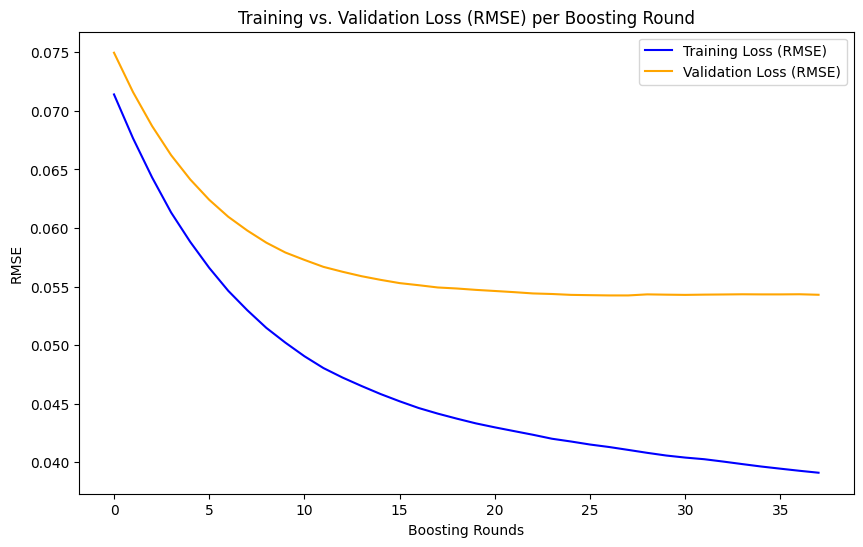

XGBoost - MSE: 0.00, R²: 0.53, RMSE: 0.05


In [45]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


## outlier models- training and stacking

In [46]:
# Step 1: Apply Isolation Forest and LOF for outlier detection on X_train and X_test
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Isolation Forest for outlier detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest_train = iso_forest.fit_predict(X_train)
iso_forest_test = iso_forest.predict(X_test)

# LOF for outlier detection
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.15) #20 --> 50

# Using fit_predict for LOF to detect outliers
lof_train = lof.fit_predict(X_train)
lof_test = lof.fit_predict(X_test)

# Step 2: Save new versions of X_train and X_test with outlier columns
X_train_new = X_train.copy()
X_test_new = X_test.copy()

# Add Isolation Forest and LOF outlier flags (1: inlier, -1: outlier)
X_train_new['outlier_iso_forest'] = (iso_forest_train == -1).astype(int)
X_test_new['outlier_iso_forest'] = (iso_forest_test == -1).astype(int)

X_train_new['outlier_lof'] = (lof_train == -1).astype(int)
X_test_new['outlier_lof'] = (lof_test == -1).astype(int)

# Step 3: Apply KMeans and DBSCAN for clustering and outlier detection
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_new.drop(['outlier_iso_forest', 'outlier_lof'], axis=1))  # Drop outlier columns before scaling
X_scaled_test = scaler.transform(X_test_new.drop(['outlier_iso_forest', 'outlier_lof'], axis=1))

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=8)
X_train_new['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

# KMeans clustering
kmeans = KMeans(n_clusters=50, random_state=42)
X_train_new['cluster_kmeans'] = kmeans.fit_predict(X_scaled_train)

# Step 4: Identifying outliers from DBSCAN and KMeans
# Outliers for DBSCAN are marked as -1
X_train_new['outlier_dbscan'] = (X_train_new['cluster_dbscan'] == -1).astype(int)

# For KMeans, outliers can be defined as data points in small clusters (adjustable threshold)
cluster_sizes_kmeans = X_train_new['cluster_kmeans'].value_counts()
small_clusters_kmeans = cluster_sizes_kmeans[cluster_sizes_kmeans <= 5].index  # Adjust size threshold
X_train_new['outlier_kmeans'] = X_train_new['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining all outlier flags
X_train_new['combined_outlier'] = ((X_train_new['outlier_iso_forest'] + X_train_new['outlier_lof'] + X_train_new['outlier_dbscan'] + X_train_new['outlier_kmeans']) > 0).astype(int)

# Step 5: Clustering on X_test
X_test_new['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)
X_test_new['cluster_kmeans'] = kmeans.predict(X_scaled_test)

# Identifying outliers for X_test
X_test_new['outlier_dbscan'] = (X_test_new['cluster_dbscan'] == -1).astype(int)
X_test_new['outlier_kmeans'] = X_test_new['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining outliers for X_test
X_test_new['outlier_iso_forest'] = (iso_forest_test == -1).astype(int)
X_test_new['outlier_lof'] = (lof_test == -1).astype(int)

X_test_new['combined_outlier'] = ((X_test_new['outlier_iso_forest'] + X_test_new['outlier_lof'] + X_test_new['outlier_dbscan'] + X_test_new['outlier_kmeans']) > 0).astype(int)

# Step 6: Train a model to predict based on outliers
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure both X_train_new and y_train have the same index
X_train_new = X_train_new.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)




# Evaluate the model
#evaluate_model(outlier_model, X_test_new.drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1), y_test, label="Outlier Model")

# Train only on the detected outliers
X_outliers = X_train_new[X_train_new['combined_outlier'] == 1].drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train_new['combined_outlier'] == 1]

outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

outlier_model.fit(X_outliers, y_outliers)

# Step 7: Evaluate the model
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the outlier model
evaluate_model(outlier_model, X_test_new.drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1), y_test, label="Outlier Model")


Outlier Model - MSE: 0.00, RMSE: 0.06, R²: 0.32, MAD: 0.06, Tail RMSE: 0.05


array([1.0216867 , 1.0169019 , 0.81735253, ..., 0.91877174, 0.9359533 ,
       0.9310557 ], dtype=float32)

In [47]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure both X_train_new and y_train have the same index
X_train_new = X_train_new.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# 1. Train Model 1 (Outlier Model)
# Extract outliers
X_outliers = X_train_new[X_train_new['combined_outlier'] == 1].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)
y_outliers = y_train[X_train_new['combined_outlier'] == 1]

# Model 1: Train on outliers
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
outlier_model.fit(X_outliers, y_outliers)

# 2. Train Model 2 (Non-Outlier Model)
# Extract non-outliers
X_non_outliers = X_train_new[X_train_new['combined_outlier'] == 0].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)
y_non_outliers = y_train[X_train_new['combined_outlier'] == 0]

# Model 2: Train on non-outliers
non_outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
non_outlier_model.fit(X_non_outliers, y_non_outliers)

# 3. Stack the models' predictions
# Make predictions using both models on the test set
X_test_new = X_test_new.reset_index(drop=True)
X_test_outliers = X_test_new[X_test_new['combined_outlier'] == 1].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)
X_test_non_outliers = X_test_new[X_test_new['combined_outlier'] == 0].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1
)

# Model 1 predictions (for outliers)
predictions_outliers = outlier_model.predict(X_test_outliers)

# Model 2 predictions (for non-outliers)
predictions_non_outliers = non_outlier_model.predict(X_test_non_outliers)

# Combine predictions: Stack the results
predictions_stacked = np.zeros_like(y_test)
predictions_stacked[X_test_new['combined_outlier'] == 1] = predictions_outliers
predictions_stacked[X_test_new['combined_outlier'] == 0] = predictions_non_outliers

# 4. Evaluate the stacked model
def evaluate_model(predictions, y_true, label="Stacked Model"):
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)
    mad = np.mean(np.abs(predictions - np.median(y_true)))
    tail_rmse = np.sqrt(np.mean((predictions[y_true > np.quantile(y_true, 0.95)] - y_true[y_true > np.quantile(y_true, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the stacked model
evaluate_model(predictions_stacked, y_test, label="Stacked Model")


Stacked Model - MSE: 0.00, RMSE: 0.05, R²: 0.52, MAD: 0.05, Tail RMSE: 0.05


array([1.02006149, 1.01781917, 0.81207538, ..., 0.9859044 , 0.95960718,
       0.95404434])

# Grid search: takes a long time to run, so I commented it out

In [56]:

'''
from xgboost import XGBRegressor, DMatrix, train, cv
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters tuning with grid search
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1]
}

# Initialize and train with GridSearchCV
xgb_grid = XGBRegressor(random_state=42, objective='reg:squarederror')
grid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use DMatrix for early stopping and evaluation tracking
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Prepare params for DMatrix training
params = best_xgb_model.get_params()
params['objective'] = 'reg:squarederror'

# Perform training with early stopping
evals_result = {}
best_xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=15,
    verbose_eval=True,
    evals_result=evals_result
)

# Plot training vs validation losses for analysis
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Predict on the test set
xgb_y_pred = best_xgb_model_trained.predict(dtest)

# Evaluate performance
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse
'''

"\nfrom xgboost import XGBRegressor, DMatrix, train, cv\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Hyperparameters tuning with grid search\nparam_grid = {\n    'n_estimators': [200, 300, 400],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'max_depth': [4, 5, 6],\n    'subsample': [0.7, 0.8, 1.0],\n    'colsample_bytree': [0.7, 0.8, 1.0],\n    'reg_alpha': [0.01, 0.1, 1],\n    'reg_lambda': [0.01, 0.1, 1]\n}\n\n# Initialize and train with GridSearchCV\nxgb_grid = XGBRegressor(random_state=42, objective='reg:squarederror')\ngrid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Use the best estimator found by GridSearchCV\nbest_xgb_model = grid_search.best_estimator_\n\n# Use DMatrix for early stopping and evaluation tracking\ndtrain = DMatrix(X_train, label=y_train)\ndtest = DMatrix(X_test, label=y_test)\n\n# Prepare params for DMatrix training\npa

## stacked XGBoost and catboost models 

**(contains PCA scatterplot example, and catboost residual plot)**

Cross-Validated MSE (XGBoost): 0.00
[0]	train-rmse:0.07140	eval-rmse:0.07496
[1]	train-rmse:0.06765	eval-rmse:0.07160
[2]	train-rmse:0.06432	eval-rmse:0.06870
[3]	train-rmse:0.06132	eval-rmse:0.06621
[4]	train-rmse:0.05882	eval-rmse:0.06415
[5]	train-rmse:0.05660	eval-rmse:0.06241
[6]	train-rmse:0.05464	eval-rmse:0.06096
[7]	train-rmse:0.05298	eval-rmse:0.05978
[8]	train-rmse:0.05147	eval-rmse:0.05875
[9]	train-rmse:0.05021	eval-rmse:0.05791
[10]	train-rmse:0.04905	eval-rmse:0.05728
[11]	train-rmse:0.04804	eval-rmse:0.05668
[12]	train-rmse:0.04723	eval-rmse:0.05626
[13]	train-rmse:0.04651	eval-rmse:0.05588
[14]	train-rmse:0.04582	eval-rmse:0.05557
[15]	train-rmse:0.04521	eval-rmse:0.05529
[16]	train-rmse:0.04463	eval-rmse:0.05512
[17]	train-rmse:0.04415	eval-rmse:0.05492
[18]	train-rmse:0.04373	eval-rmse:0.05483
[19]	train-rmse:0.04332	eval-rmse:0.05472
[20]	train-rmse:0.04298	eval-rmse:0.05462
[21]	train-rmse:0.04266	eval-rmse:0.05452
[22]	train-rmse:0.04235	eval-rmse:0.05441
[23]	tra

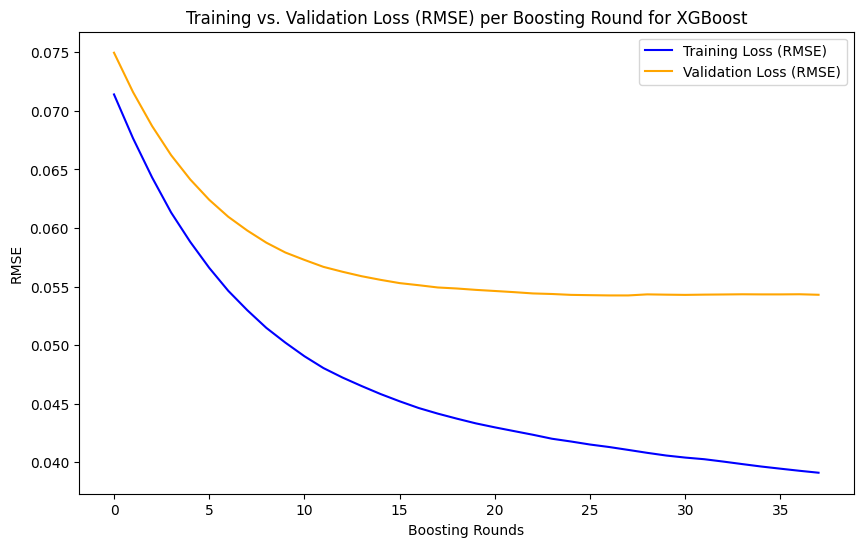

XGBoost - MSE: 0.00, R²: 0.53, RMSE: 0.05


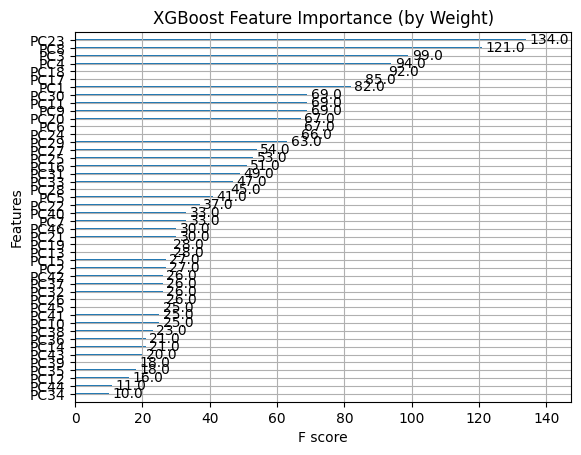

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0724144	test: 0.0757366	best: 0.0757366 (0)	total: 11.6ms	remaining: 5.79s
50:	learn: 0.0464635	test: 0.0541950	best: 0.0541831 (49)	total: 398ms	remaining: 3.5s
100:	learn: 0.0441746	test: 0.0538444	best: 0.0538433 (97)	total: 775ms	remaining: 3.06s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.05383033692
bestIteration = 109

Shrink model to first 110 iterations.
CatBoost - MSE: 0.00, R²: 0.54, RMSE: 0.05


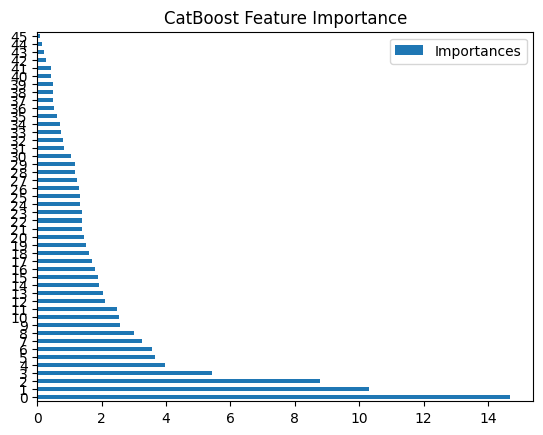

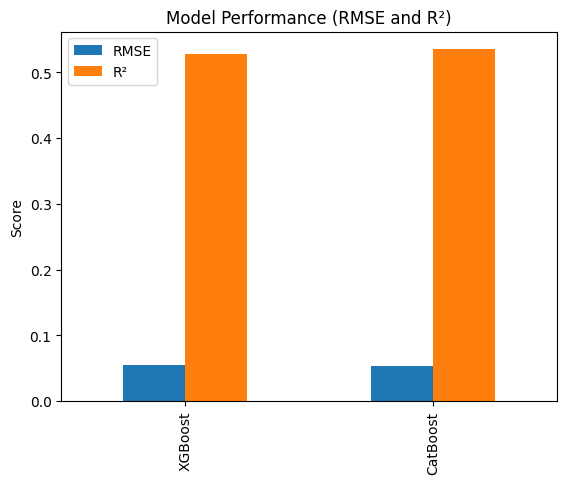

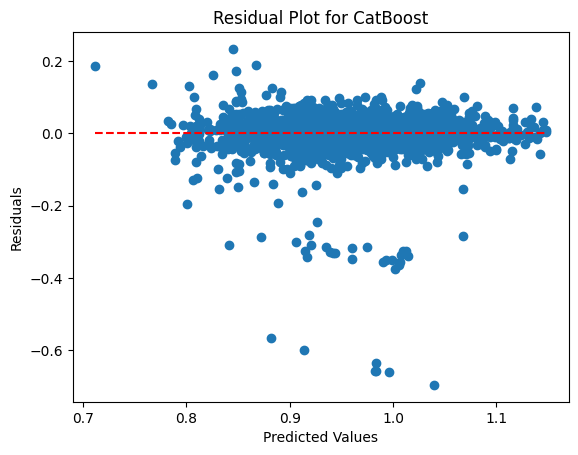

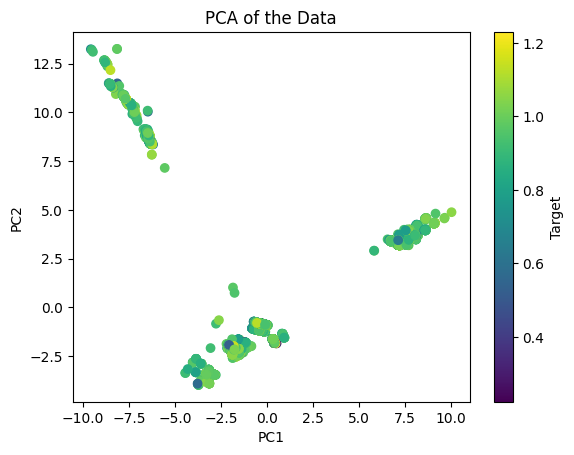

'\n# --- SHAP Analysis for Feature Interpretability ---\n\n# SHAP summary plot for feature importance\nexplainer = shap.Explainer(xgb_model, X_train)\nshap_values = explainer(X_test)\nshap.summary_plot(shap_values, X_test)\n'

In [62]:
# Import required libraries
from xgboost import XGBRegressor, DMatrix, train, plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- XGBoost Code ---

# Initialize XGBRegressor with regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Cross-validation to estimate model performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE (XGBoost): {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for XGBoost training
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Evaluate both train and validation losses during training
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract losses from evals_result
train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()

# Make predictions and evaluate performance
xgb_y_pred = xgb_model_trained.predict(dtest)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")

# Feature importance plot for XGBoost
plot_importance(xgb_model_trained, importance_type='weight', title='XGBoost Feature Importance (by Weight)')
plt.show()

# --- CatBoost Code ---

# Identify categorical features and prepare data pools
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Initialize and train CatBoost with early stopping
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    eval_metric='RMSE',
    cat_features=categorical_features_indices
)

# Fit the model with early stopping and log evaluation metrics
catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Make predictions and evaluate performance
catboost_y_pred = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)
catboost_rmse = np.sqrt(catboost_mse)

print(f"CatBoost - MSE: {catboost_mse:.2f}, R²: {catboost_r2:.2f}, RMSE: {catboost_rmse:.2f}")

# Feature importance plot for CatBoost
feature_importance = pd.DataFrame(catboost_model.get_feature_importance(prettified=True))
feature_importance.plot(kind='barh', title='CatBoost Feature Importance')
plt.show()

# --- Additional Metrics Plot ---

# Compile and plot model performance metrics
metrics = {'RMSE': [xgb_rmse, catboost_rmse], 'R²': [xgb_r2, catboost_r2]}
df_metrics = pd.DataFrame(metrics, index=['XGBoost', 'CatBoost'])

df_metrics.plot(kind='bar', title="Model Performance (RMSE and R²)")
plt.ylabel("Score")
plt.show()

# --- Residual Plot ---

# Calculate residuals and plot residuals vs predictions
residuals = y_test - catboost_y_pred
plt.scatter(catboost_y_pred, residuals)
plt.hlines(y=0, xmin=min(catboost_y_pred), xmax=max(catboost_y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for CatBoost')
plt.show()

# --- PCA Analysis (optional) ---

# PCA plot to visualize data clusters based on target
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)  # Replace X with your data
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y, cmap='viridis')  # Replace y with your labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the Data')
plt.colorbar(label='Target')
plt.show()
d
'''
# --- SHAP Analysis for Feature Interpretability ---

# SHAP summary plot for feature importance
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
'''


# XGBoost Gridsearch

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Predictions and Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"XGBoost - MSE: {mse:.2f}, R²: {r2:.2f}, RMSE: {rmse:.2f}")


# end of code testing main models

## start of other models: gradient boosting
(did not use these in the final analysis- but left them for reference)

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Gradient Boosting - MSE: 0.00, R²: 0.53, RMSE: 0.05


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, and y_test
# For example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Gradient Boosting - MSE: 0.00, R²: 0.53, RMSE: 0.05


In [65]:
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")

Gradient Boosting - MSE: 0.00, R²: 0.53, RMSE: 0.05


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Ensure your X_train and y_train are defined
# X_train = ... (your features)
# y_train = ... (your target variable)

# Step 1: Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)  # Fit the model

# Step 2: Make Predictions
gb_y_pred = gb_model.predict(X_test)

# Step 3: Evaluate the Model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")



Gradient Boosting - MSE: 0.00, R²: 0.53, RMSE: 0.05


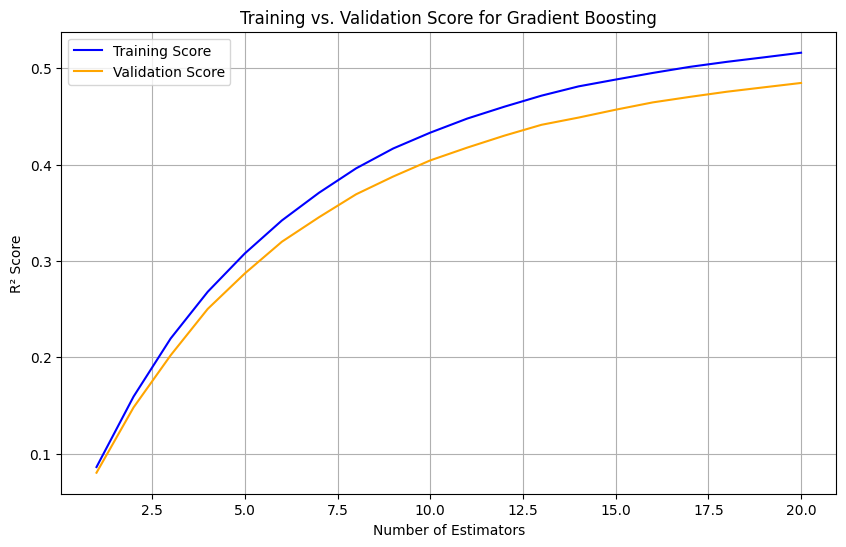

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Example: Ensure your X_train and y_train are defined
# X_train = ... (your features)
# y_train = ... (your target variable)

# Step 1: Initialize lists for scores
train_scores = []
test_scores = []

# Step 2: Iterate through a reduced number of estimators
for i in range(1, 21):  # Reduced to 20 for faster computation
    gb_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, random_state=42)
    
    # Use cross-validation for training score
    train_cv_score = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_cv_score)

    # Fit the model on the full training data
    gb_model.fit(X_train, y_train)
    
    # Calculate validation score
    test_scores.append(gb_model.score(X_test, y_test))

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Score', color='blue')
plt.plot(range(1, 21), test_scores, label='Validation Score', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('Training vs. Validation Score for Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()


## old models: random forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Split your data
X_train, X_test, y_train, y_test = train_test_split(first_46_pcs_df, one_hot_encoded_df2['proficient_score'], test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}, RMSE: {rf_rmse:.2f}")


Random Forest - MSE: 0.00, R²: 0.47, RMSE: 0.06


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_46_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [5]
}

rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV for tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Predictions
rf_y_pred = best_rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - Best Parameters: {grid_search.best_params_}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}, RMSE: {rf_rmse:.2f}")


Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - MSE: 0.00, R²: 0.49, RMSE: 0.06


## other old models

In [60]:
from sklearn.neighbors import KNeighborsRegressor

# Train K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"K-Nearest Neighbors - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, RMSE: {knn_rmse:.2f}")


K-Nearest Neighbors - MSE: 0.00, R²: 0.48, RMSE: 0.06


Stacked Model - MSE: 0.00, R²: 0.53, RMSE: 0.05


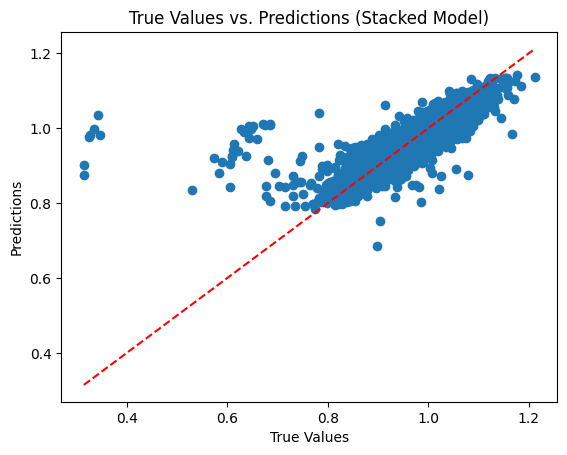

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_55_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Step 2: Random Forest Model with K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_train_preds = np.zeros(X_train.shape[0])
rf_test_preds = np.zeros(X_test.shape[0])

for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]  # Use iloc here
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
    rf_model.fit(X_kf_train, y_kf_train)
    
    rf_train_preds[val_index] = rf_model.predict(X_kf_val)

rf_test_preds = rf_model.predict(X_test)

# Step 3: CatBoost Model with K-Fold
cat_train_preds = np.zeros(X_train.shape[0])
cat_test_preds = np.zeros(X_test.shape[0])

for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]  # Use iloc here
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
    train_pool = Pool(X_kf_train, y_kf_train, cat_features=categorical_features_indices)
    validation_pool = Pool(X_kf_val, y_kf_val, cat_features=categorical_features_indices)

    catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
    catboost_model.fit(train_pool, eval_set=validation_pool, use_best_model=True)

    cat_train_preds[val_index] = catboost_model.predict(X_kf_val)

cat_test_preds = catboost_model.predict(X_test)


# Step 4: Stack Predictions
stacked_train = np.column_stack((rf_train_preds, cat_train_preds))
stacked_test = np.column_stack((rf_test_preds, cat_test_preds))

# Fit the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(stacked_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Stacked Model - MSE: {final_mse:.2f}, R²: {final_r2:.2f}, RMSE: {final_rmse:.2f}")

# Optional: Visualizing the performance of the stacked model
plt.scatter(y_test, final_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Stacked Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


# Models that need to be tuned/ didn't work

In [70]:
from sklearn.svm import SVR

# Train Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Evaluate
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)

print(f"Support Vector Regressor - MSE: {svr_mse:.2f}, R²: {svr_r2:.2f}, RMSE: {svr_rmse:.2f}")


Support Vector Regressor - MSE: 0.00, R²: 0.39, RMSE: 0.06


In [71]:
#didnt work
'''
from sklearn.linear_model import ElasticNet

# Train Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)

# Predictions
en_y_pred = elastic_net_model.predict(X_test)

# Evaluate
en_mse = mean_squared_error(y_test, en_y_pred)
en_r2 = r2_score(y_test, en_y_pred)
en_rmse = np.sqrt(en_mse)

print(f"Elastic Net - MSE: {en_mse:.2f}, R²: {en_r2:.2f}, RMSE: {en_rmse:.2f}")
'''


Elastic Net - MSE: 0.01, R²: -0.00, RMSE: 0.08


In [72]:
# didnt work

'''
from sklearn.linear_model import Lasso

# Train Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {lasso_r2:.2f}, RMSE: {lasso_rmse:.2f}")
'''


Lasso Regression - MSE: 0.01, R²: -0.00, RMSE: 0.08


In [73]:
from sklearn.linear_model import Ridge

# Train Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")


Ridge Regression - MSE: 0.00, R²: 0.26, RMSE: 0.07


Grid search for gradient boosting model

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
}

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up Grid Search
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=1)
gb_grid_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

# Predictions
gb_y_pred = best_gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation for training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation for validation scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')

    # Plotting the standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

    # Adding titles and labels
    plt.title('Random Forest Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with your Random Forest model and data
plot_learning_curve(rf_model, X_train, y_train)


KeyboardInterrupt: 

Grid search for ridge`

In [ ]:
# Hyperparameter tuning for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
}

# Create Ridge model
ridge_model = Ridge(random_state=42)

# Set up Grid Search
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, 
                                  cv=5, scoring='neg_mean_squared_error', verbose=1)
ridge_grid_search.fit(X_train, y_train)

# Best Ridge model
best_ridge_model = ridge_grid_search.best_estimator_

# Predictions
ridge_y_pred = best_ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Best Ridge Parameters: {ridge_grid_search.best_params_}")
print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")

stacked models

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare base models for stacking
print("Preparing base models for stacking...")
ridge_model = Ridge(alpha=1.0, random_state=42)
xgb_model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Create a stacking regressor
print("Creating a stacking regressor...")
stacked_model = StackingRegressor(
    estimators=[
        ('ridge', ridge_model),
        ('xgb', xgb_model),
        ('gb', gb_model)
    ],
    final_estimator=RidgeCV(alphas=np.logspace(-3, 3, 7))
)

# Step 3: Train the stacked model
print("Training the stacked model...")
stacked_model.fit(X_train, y_train)
print("Stacked model training completed.")

# Step 4: Make predictions
print("Making predictions with the stacked model...")
stacked_y_pred = stacked_model.predict(X_test)

# Step 5: Evaluate the stacked model
print("Evaluating the stacked model...")
stacked_mse = mean_squared_error(y_test, stacked_y_pred)
stacked_r2 = r2_score(y_test, stacked_y_pred)
stacked_rmse = np.sqrt(stacked_mse)

print(f"Stacked Model - MSE: {stacked_mse:.2f}, R²: {stacked_r2:.2f}, RMSE: {stacked_rmse:.2f}")

# Optional: Bagging with Ridge Regression
print("Training Bagging model with Ridge Regression...")
bagging_model = BaggingRegressor(estimator=ridge_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
print("Bagging model training completed.")

# Making predictions with Bagging model
print("Making predictions with the Bagging model...")
bagging_y_pred = bagging_model.predict(X_test)

# Evaluate Bagging Model
print("Evaluating Bagging model...")
bagging_mse = mean_squared_error(y_test, bagging_y_pred)
bagging_r2 = r2_score(y_test, bagging_y_pred)
bagging_rmse = np.sqrt(bagging_mse)

print(f"Bagging with Ridge - MSE: {bagging_mse:.2f}, R²: {bagging_r2:.2f}, RMSE: {bagging_rmse:.2f}")


light gbm model

In [ ]:
'''
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Define the LightGBM model
print("Defining the LightGBM model...")
lgb_model = lgb.LGBMRegressor(random_state=42)

# Step 2: Set up the parameter grid for hyperparameter tuning
print("Setting up the parameter grid for hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [31, 63, 127],
    'subsample': [0.6, 0.8, 1.0],
}

# Step 3: Create a custom scoring function to track progress
def verbose_grid_search(estimator, param_grid, X, y):
    print("Starting Grid Search...")
    for n_estimators in param_grid['n_estimators']:
        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                for num_leaves in param_grid['num_leaves']:
                    for subsample in param_grid['subsample']:
                        print(f"Evaluating: n_estimators={n_estimators}, learning_rate={learning_rate}, "
                              f"max_depth={max_depth}, num_leaves={num_leaves}, subsample={subsample}")
                        # Fit the model with current parameters
                        estimator.set_params(n_estimators=n_estimators, learning_rate=learning_rate,
                                              max_depth=max_depth, num_leaves=num_leaves, subsample=subsample)
                        estimator.fit(X, y)

# Perform Grid Search with verbose output
print("Performing custom Grid Search with detailed progress...")
verbose_grid_search(lgb_model, param_grid, X_train, y_train)

# Step 4: After manually searching, you would store the best parameters manually based on your criteria.

# Step 5: Make predictions using the best model (you can specify your best parameters here)
print("Making predictions using the best LightGBM model...")
best_lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, num_leaves=31, subsample=1.0, random_state=42)
best_lgb_model.fit(X_train, y_train)
lgb_y_pred = best_lgb_model.predict(X_test)

# Step 6: Evaluate the LightGBM model
print("Evaluating the LightGBM model...")
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print(f"LightGBM - MSE: {lgb_mse:.2f}, R²: {lgb_r2:.2f}, RMSE: {lgb_rmse:.2f}")
'''